# Introdução

## Equipa
<ul>
    <li>Gonçalo Oliveira - 18559
    <li>André Reis - 26012
    <li>Diogo Gonçalves - 26021
</ul>

## Contexto do Projeto
O projeto tem como objetivo explorar e compreender os fatores que influenciam o ambiente urbano e o mercado imobiliário de Boston, utilizando dados quantitativos sobre características da região.

## Objetivos
<ol>
    <li> Classificação Supervisionada
    <ul>
        <li> Objetivo: Prever a proximidade ao Rio Charles (chas) usando as variáveis disponíveis.
        <li> Explicação: Determinar quais fatores (como criminalidade, poluição ou acessibilidade) são mais indicativos da proximidade ao Rio.
    </ul>
    <li> Agrupamento com K-Means
    <ul>
        <li> Objetivo: Agrupar regiões com base em características como criminalidade (crim), acessibilidade (rad) e idade das construções (age).
        <li> Explicação: Identificar padrões com características semelhantes para direcionar políticas públicas, como segurança ou infraestrutura.
    </ul>
    <li> Regras de Associação (Apriori)
    <ul>
        <li> Objetivo: Descobrir associações entre alta criminalidade (crim), poluição (nox) e acessibilidade (rad).
        <li> Explicação: Detectar relações entre variáveis que podem impactar na qualidade de vida ou no valor das propriedades de uma região.
    </ul>
</ol>

# Conjunto de dados

## Dataset utilizado
O dataset utilizado foi obtido no seguinte website: https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset/data?select=BostonHousing.csv

## Explicação colunas
<ul>
    <li>crim: Taxa de criminalidade per capita por cidade.
    <li>zn: Proporção de grandes lotes residenciais (acima de 25.000 pés quadrados).
    <li>indus: Proporção de terrenos comerciais e industriais  por cidade.
    <li>chas: Variável binária que indica se o imóvel fica próximo ao Rio Charles (1 para sim, 0 para não).
    <li>nox: Concentração de óxidos de nitrogênio no ar.
    <li>rm: Número médio de divisões por habitação.
    <li>age: proporção de unidades antigas ocupadas pelos proprietários construídas antes de 1940.
    <li>dis: Distâncias média até os centros de emprego de Boston.
    <li>rad: Índice de acessibilidade às auto-estradas.
    <li>tax: Taxa de imposto sobre a propriedade por $10.000.
</ul>


## Dataset Metadata

| Coluna   | Tipo de Dado |
| -------- | ------------ |
| crim     | float        |
| zn       | float        |
| indus    | float        |
| chas     | int          |
| nox      | float        |
| rm       | float        |
| age      | float        |
| dis      | float        |
| rad      | int          |
| tax      | int          |


## Configuração Inicial

In [212]:
# Import required libraries

# linear algebra and data processing libraries
import pandas as pd
import numpy as np

# Graphics Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

data_path = ("BostonHousing.csv")
data = pd.read_csv(data_path)

pd.DataFrame(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Remoção de Colunas
O dataset nao era explicito quanto a certas colunas, para não sermos induzidos a erro decidimos remover as colunas (ptration, b, lstat, medv)

In [213]:
data_trimmed = data.iloc[:, :-4]
pd.DataFrame(data_trimmed)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273


## Verificação de valores nulos

In [214]:
data_trimmed.isna().sum()

crim     0
zn       0
indus    0
chas     0
nox      0
rm       5
age      0
dis      0
rad      0
tax      0
dtype: int64

Existem 5 valores nulos na coluna __rn__

## Visualização e Remoção das linhas com valores nulos

In [215]:
# Filtrar e exibir as linhas onde 'rm' é nulo
null_rows = data_trimmed[data_trimmed['rm'].isnull()]

# Exibir as linhas com valores nulos
print(null_rows)

# Remover linhas onde a coluna 'rm' é nula
data_cleaned = data_trimmed.dropna(subset=['rm'])

# Verificar se há valores nulos restantes na coluna 'rm'
print("\nValores nulos em 'rm' após limpeza:", data_cleaned['rm'].isnull().sum())

null_rows_after_clean = data_cleaned[data_cleaned['rm'].isnull()]
print(null_rows_after_clean)

        crim    zn  indus  chas    nox  rm   age     dis  rad  tax
10   0.22489  12.5   7.87     0  0.524 NaN  94.3  6.3467    5  311
35   0.06417   0.0   5.96     0  0.499 NaN  68.2  3.3603    5  279
63   0.12650  25.0   5.13     0  0.453 NaN  43.4  7.9809    8  284
96   0.11504   0.0   2.89     0  0.445 NaN  69.6  3.4952    2  276
135  0.55778   0.0  21.89     0  0.624 NaN  98.2  2.1107    4  437

Valores nulos em 'rm' após limpeza: 0
Empty DataFrame
Columns: [crim, zn, indus, chas, nox, rm, age, dis, rad, tax]
Index: []


Podemos verificar as 5 linhas onde existem valores nulos, de seguida podemos verificar que as mesmas foram removidas

## Verificação de valores Duplicados

In [216]:
data_cleaned.duplicated().sum()

np.int64(0)

Não existem valores duplicados

## Verificação de Valores Negativos

In [217]:
negativos = data_cleaned[data_cleaned < 0].any()
print(negativos)

crim     False
zn       False
indus    False
chas     False
nox      False
rm       False
age      False
dis      False
rad      False
tax      False
dtype: bool


Podemos verificar que não existem valores negativos

## Identificar e Remover Outlier

In [218]:
# Função para encontrar outliers
def detect_outliers(df, features):
    outlier_indices = []  # Para armazenar os índices dos outliers
    outlier_columns = {}  # Para rastrear colunas responsáveis

    for c in features:
        # 1º quartil
        Q1 = np.percentile(df[c], 25)
        # 3º quartil
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Limite para outliers
        outlier_step = IQR * 1.5
        # Detecta os índices de outliers
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        print(f"Coluna: {c}, Limite Inferior: {Q1 - outlier_step}, Limite Superior: {Q3 + outlier_step}")
        # Armazena os índices
        outlier_indices.extend(outlier_list_col)

        # Armazena as colunas responsáveis
        for index in outlier_list_col:
            if index not in outlier_columns:
                outlier_columns[index] = []
            outlier_columns[index].append(c)


    # Contabiliza outliers que aparecem em mais de 2 variáveis
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers, outlier_columns

# Selecionar apenas as colunas mantidas
features_to_check = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]

# Identificar outliers
outliers, outlier_columns = detect_outliers(data_cleaned, features_to_check)

# Exibir os índices dos outliers detectados
print("\nOutliers detectados:\n", outliers)
print(data_cleaned.loc[outliers])
for index in outliers:
    print(f"\nOutlier no índice {index}: colunas {outlier_columns[index]}\n")

# Remover outliers do dataset
data_cleaned = data_cleaned.drop(outliers, axis=0).reset_index(drop=True)

print(f"Linha {outliers} removida.")


Coluna: crim, Limite Inferior: -5.33469, Limite Superior: 9.10979
Coluna: zn, Limite Inferior: -18.75, Limite Superior: 31.25
Coluna: indus, Limite Inferior: -14.175, Limite Superior: 37.465
Coluna: chas, Limite Inferior: 0.0, Limite Superior: 0.0
Coluna: nox, Limite Inferior: 0.18650000000000005, Limite Superior: 0.8865
Coluna: rm, Limite Inferior: 4.772500000000001, Limite Superior: 7.7364999999999995
Coluna: age, Limite Inferior: -28.5, Limite Superior: 167.5
Coluna: dis, Limite Inferior: -2.4565000000000006, Limite Superior: 9.662700000000001
Coluna: rad, Limite Inferior: -26.0, Limite Superior: 54.0
Coluna: tax, Limite Inferior: -301.5, Limite Superior: 1246.5

Outliers detectados:
 [283]
        crim    zn  indus  chas    nox     rm   age    dis  rad  tax
283  0.01501  90.0   1.21     1  0.401  7.923  24.8  5.885    1  198

Outlier no índice 283: colunas ['zn', 'chas', 'rm']

Linha [283] removida.


1 outlier foi detectado e removido.

# Vizualização

## Correlação entre Variáveis

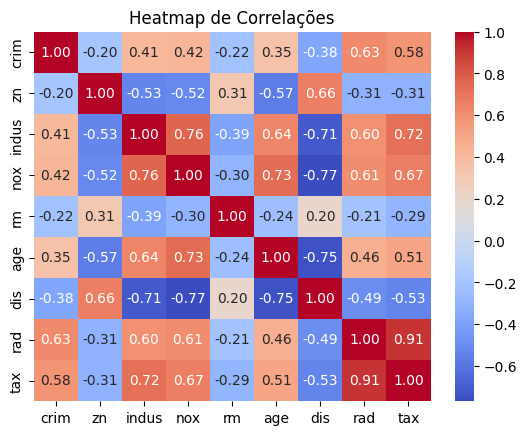

In [219]:
# 1. **Correlação entre variáveis**
list1 = ["crim", "zn", "indus", "nox", "rm", "age", "dis", "rad", "tax"]
sns.heatmap(data[list1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap de Correlações")
plt.show()


## Diagrama de Caixa (chas vs nox)

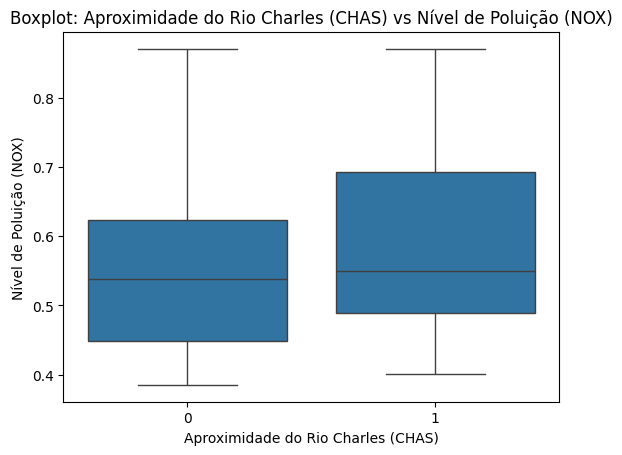

In [220]:
# 2. **Boxplot: Aproximidade do Rio Charles  (chas) vs. Classe Acessibilidade (nox)**
sns.boxplot(x="chas", y="nox", data=data)
plt.title("Boxplot: Aproximidade do Rio Charles (CHAS) vs Nível de Poluição (NOX)")
plt.xlabel("Aproximidade do Rio Charles (CHAS)")
plt.ylabel("Nível de Poluição (NOX)")
plt.show()

# Implementação

## Implementação Supervised

### Método Decision Tree

#### Model Assessment

In [221]:
x = data_cleaned.drop('chas', axis=1)
y = data_cleaned['chas']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

dtree = DecisionTreeClassifier(random_state=1234)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

#### Visualização da árvore

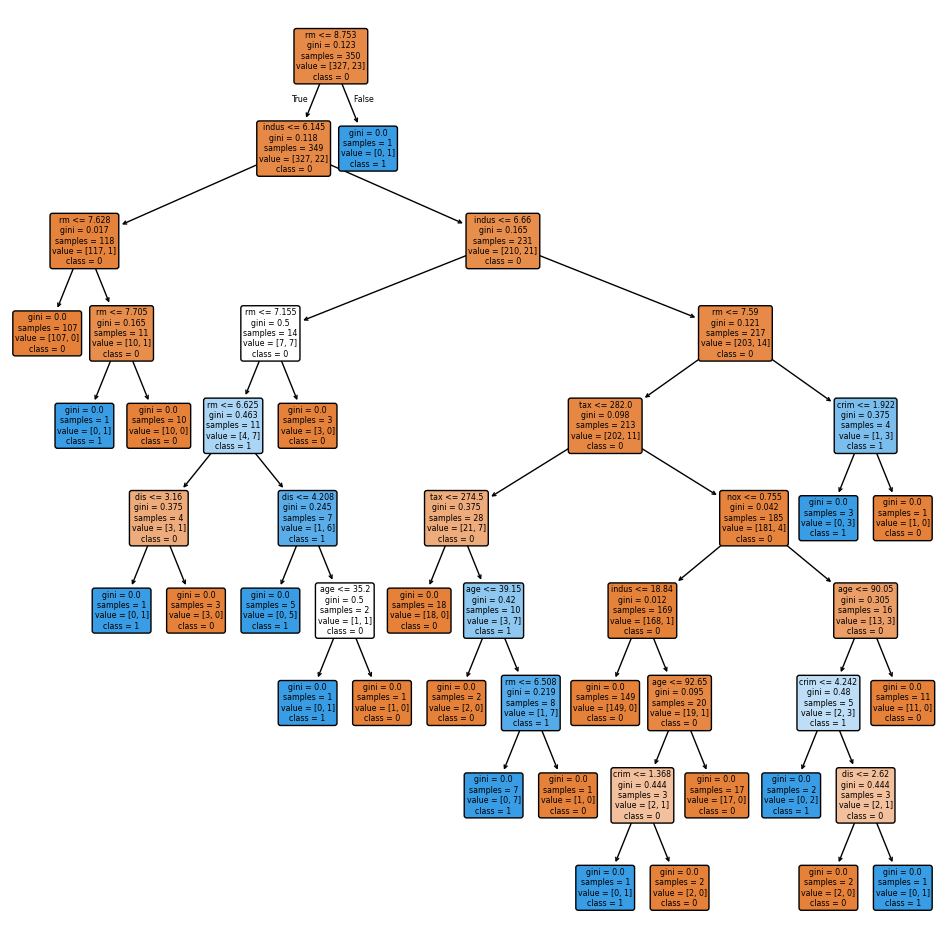

In [222]:
plt.figure(figsize=(12,12))
plot_tree(dtree,
                    feature_names=x.columns,
                    class_names=[str(cls) for cls in y.unique()],
                    filled=True, rounded=True)
plt.show()

#### Model Assessment

Accuracy: 0.9133333333333333
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       139
           1       0.33      0.18      0.24        11

    accuracy                           0.91       150
   macro avg       0.64      0.58      0.59       150
weighted avg       0.89      0.91      0.90       150



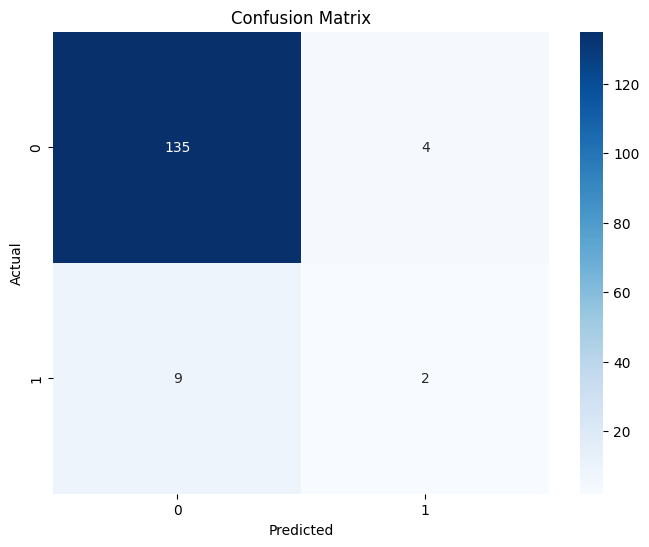

In [223]:
# Assess the model
y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix

cmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cmatrix, annot= True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

O modelo obteve uma accuracy geral de 91.33%, indicando um bom desempenho. No entanto, a análise por classe revela diferenças significativas:

Classe 0 (Não perto do Rio Charles): Excelente desempenho com precision de 94%, recall de 97% e um F1-score de 95%, mostrando que o modelo identifica muito bem esta classe.

Classe 1 (Perto do Rio Charles): Desempenho limitado com precision de 33%, recall de 18% e um F1-score de 24%, evidenciando dificuldades em prever corretamente os imóveis desta classe minoritária.

#### Melhores parâmetros do modelo

In [224]:
param_grid = {
    'max_depth': range(2, 10),
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(dtree, param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


Após ajustar o modelo com GridSearchCV, foram encontrados os melhores valores, sendo estes, {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, o modelo otimizado obteve uma accuracy de 92.7%, indicando uma melhoria em relação ao modelo anterior.

### Método K-fold

#### Model instantiation

In [225]:
feature_names = data_cleaned.columns.drop('chas').tolist()
features = data_cleaned[feature_names]

target = data_cleaned['chas']
target_names = ['Near Charles', 'Not Near Charles']

print ('Features', feature_names, 'Classes', target_names)

classifier = DecisionTreeClassifier(random_state=27)

Features ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax'] Classes ['Near Charles', 'Not Near Charles']


#### Model Assessment

In [226]:
acc_score = cross_val_score(classifier, features, target, cv=10)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )

f1_score = cross_val_score(classifier, features, target, cv=10, scoring='f1_macro')
print("CV Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

CV Mean Accuracy: 0.798 (+/- 0.105)
CV Mean F1: 0.492 (+/- 0.067)


#### Model deployment

In [227]:
final_classifier = classifier.fit(features, target)

x_new = data_cleaned.drop(columns=['chas']).iloc[0].to_numpy().reshape(1,-1)
prediction = final_classifier.predict(x_new)

print(classification_report(target, final_classifier.predict(features), digits=3))
print(confusion_matrix(target, final_classifier.predict(features)))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       466
           1      1.000     1.000     1.000        34

    accuracy                          1.000       500
   macro avg      1.000     1.000     1.000       500
weighted avg      1.000     1.000     1.000       500

[[466   0]
 [  0  34]]


c:\Users\Goncalo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Durante o K-fold com 10 folds, o modelo teve uma accuracy média de 79.8%. Isso indica que o modelo previu 79.8% dos casos, com um desvio padrão de +/- 0.105(10.5%), o que é relativamente alto e isso pode indicar instabilidade no modelo.
Quanto ao F1-score, este foi consideravelmente mais baixo(49.2%), sugerindo que o modelo tem dificuldade em lidar com o equilibrio entre precisão e recall.

Quanto ao desempenho no Conjunto completo de dados, o modelo alcançou resultados perfeitos para ambas classes.

Quanto à Confusion Matrix, o modelo classificou corretamente 466 exemplos da classe 'Not Near Charles' e 34 exemplos da classe 'Near Charles'

#### Melhores Parâmetros do modelo

In [228]:
param_grid = {
    'max_depth': range(2, 20),
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(classifier, param_grid, cv= 10, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}


Após ajustar o modelo com GridSearchCV, foram encontrados os melhores valores, sendo estes, {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}, o modelo otimizado obteve uma accuracy de 92.7%, indicando uma melhoria em relação ao modelo anterior.

## Implementação Unsupervised- KMeans

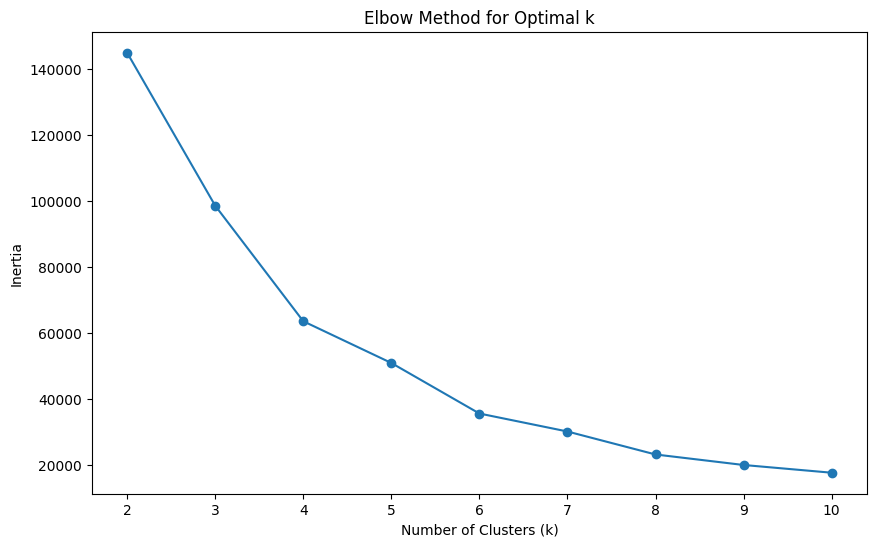

In [229]:
data_scaled = data_cleaned[['crim', 'rad', 'age']]

# Inicializar listas para resultados
inertia = []
silhouette_scores = []
k_values = range(2, 11)

# Testar valores de k de 2 a 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Gráfico do Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

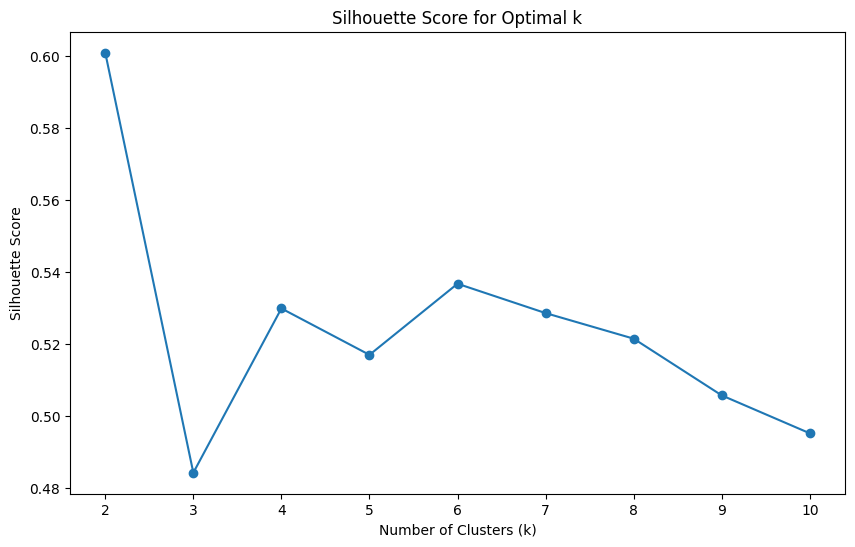

In [230]:
# Gráfico do Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [231]:
from sklearn.cluster import KMeans

# Definir o número ótimo de clusters (baseado na análise anterior)
optimal_k = 2

# Aplicar K-Means ao dataset padronizado
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_cleaned)

# Adicionar a atribuição de clusters ao dataset original
data_cleaned['cluster'] = clusters

# Visualizar uma amostra do dataset com os clusters
data_cleaned.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,0


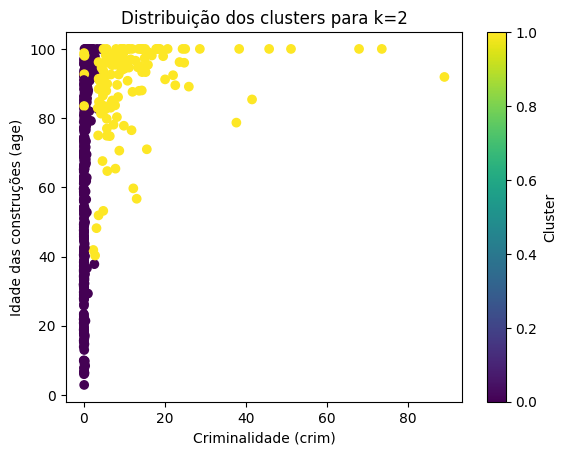

In [232]:
plt.scatter(data_cleaned['crim'], data_cleaned['age'], c=data_cleaned['cluster'], cmap='viridis')
plt.xlabel('Criminalidade (crim)')
plt.ylabel('Idade das construções (age)')
plt.title('Distribuição dos clusters para k=2')
plt.colorbar(label='Cluster')
plt.show()

In [233]:
# Selecionar características relevantes para o agrupamento
features = ['crim', 'rad', 'age']  # Criminalidade, acessibilidade e idade das construções
if all(feature in data_cleaned.columns for feature in features):
    data_features = data_cleaned[features]

    # Escalonar as características para padronização
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_features)

    # Aplicar o modelo K-Means com k=2 (ajuste conforme necessário)
    kmeans = KMeans(n_clusters=2, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Adicionar as atribuições de cluster ao dataset original
    data_cleaned['cluster'] = clusters

    # Preparar uma classe para avaliação, usando 'crim' como exemplo (ajuste conforme necessário)
    # Criar classes verdadeiras: regiões com alta e baixa criminalidade
    median_crim = data_cleaned['crim'].median()
    data_cleaned['true_class'] = data_cleaned['crim'].apply(lambda x: 1 if x > median_crim else 0)

    # Avaliar o agrupamento
    print("\nMatriz de confusão:")
    print(metrics.confusion_matrix(data_cleaned['true_class'], clusters))
else:
    print("Nem todas as colunas necessárias estão presentes no dataset. Verifique se 'crim', 'rad' e 'age' existem.")



Matriz de confusão:
[[250   0]
 [118 132]]


In [234]:
# Função para analisar clusters
def analyze_clusters(data, clusters):
    # Adicionar os clusters ao dataset
    data['cluster'] = clusters

    # Contar a distribuição das classes verdadeiras em cada cluster
    cluster_class_counts = data.groupby(['cluster', 'true_class']).size().unstack(fill_value=0)
    
    # Criar estatísticas dos clusters
    cluster_stats = pd.DataFrame()
    cluster_stats['cluster'] = cluster_class_counts.index
    cluster_stats['total_samples'] = cluster_class_counts.sum(axis=1)

    # Adicionar contagem de classes por cluster
    for true_class in data['true_class'].unique():
        cluster_stats[f'class_{true_class}_count'] = cluster_class_counts.get(true_class, 0)

    # Calcular proporção de cada classe dentro dos clusters (opcional)
    for true_class in data['true_class'].unique():
        cluster_stats[f'class_{true_class}_proportion'] = cluster_class_counts.get(true_class, 0) / cluster_stats['total_samples']

    return cluster_stats

# Exemplo de uso
cluster_analysis = analyze_clusters(data_cleaned, clusters)

# Exibir análise
print(cluster_analysis)


   cluster  total_samples  class_0_count  class_1_count  class_0_proportion  \
0        0            368            250            118            0.679348   
1        1            132              0            132            0.000000   

   class_1_proportion  
0            0.320652  
1            1.000000  


In [235]:
# Agrupar os dados por cluster e calcular a média das colunas relevantes
cluster_averages = data_cleaned.groupby('cluster')[['crim', 'rad', 'age']].mean()

# Exibir os resultados
print("Médias das variáveis por cluster:")
print(cluster_averages)

Médias das variáveis por cluster:
              crim        rad        age
cluster                                 
0         0.388894   4.453804  60.994837
1        12.759291  24.000000  89.805303


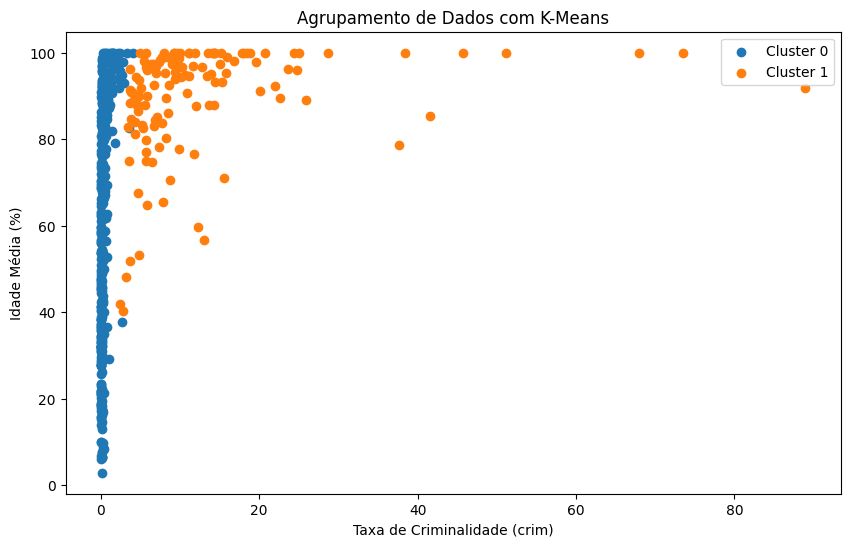

In [237]:
# Visualize cluster assignments
plt.figure(figsize=(10, 6))
unique_clusters = data_cleaned['cluster'].unique()

for cluster_id in unique_clusters:
    cluster_data = data_cleaned[data_cleaned['cluster'] == cluster_id]
    plt.scatter(cluster_data['crim'], cluster_data['age'], label=f'Cluster {cluster_id}')

plt.xlabel('Taxa de Criminalidade (crim)')
plt.ylabel('Idade Média (%)')
plt.title('Agrupamento de Dados com K-Means')
plt.legend()
plt.show()